In [1]:
# importing libaries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

### Dataset Loading

In [3]:
# loading the digital letters dataset
df = pd.read_csv('digital_letters_alt.csv')
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,label
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,7795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,V
7796,7796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,W
7797,7797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X
7798,7798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y


In [4]:
# dropping first column as it is not a pixel feature only just an index of images
df = df.drop(columns = ['Unnamed: 0'])
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,V
7796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,W
7797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X
7798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y


### Data Preparation and exploration of dataset

In [5]:
# reshaping feature set and making the response variable a numpy vector
X = np.array(df.drop(columns='label')).reshape((len(df),28,28,1))
print('New shape of feature:',X.shape)
y = np.array(df['label'])
print('shape of class:',y.shape)

New shape of feature: (7800, 28, 28, 1)
shape of class: (7800,)


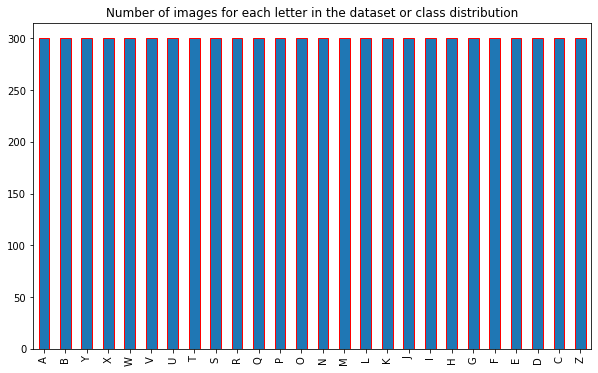

In [10]:
# frequency counts for each letter or class distribution
plt.figure(figsize=(10,6))
df['label'].value_counts().plot.bar(edgecolor='r')
plt.title('Number of images for each letter in the dataset or class distribution')
plt.show()

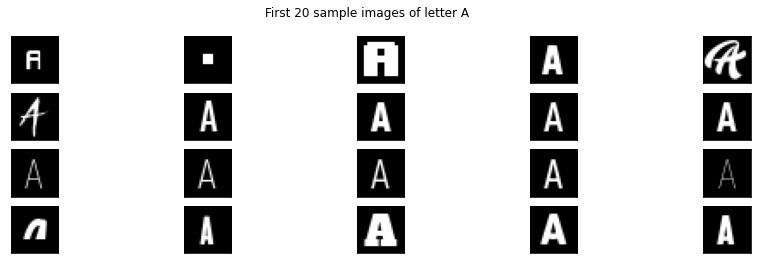

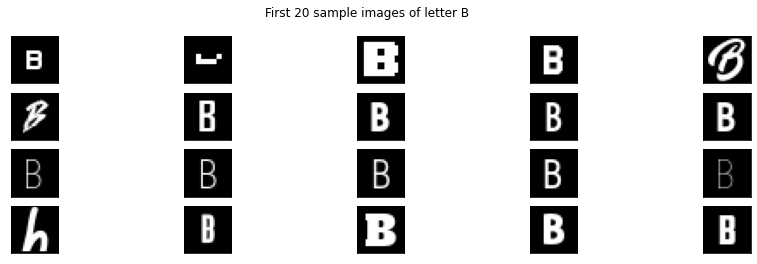

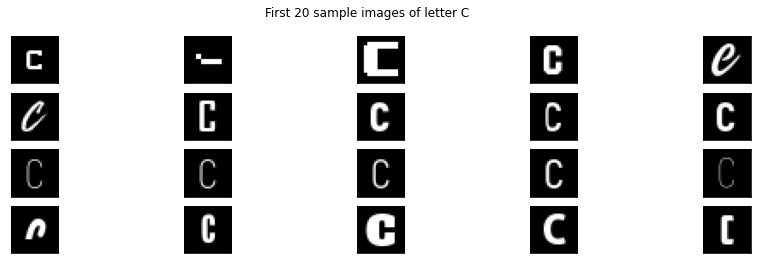

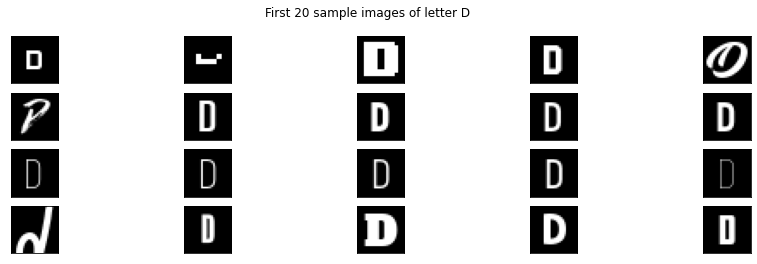

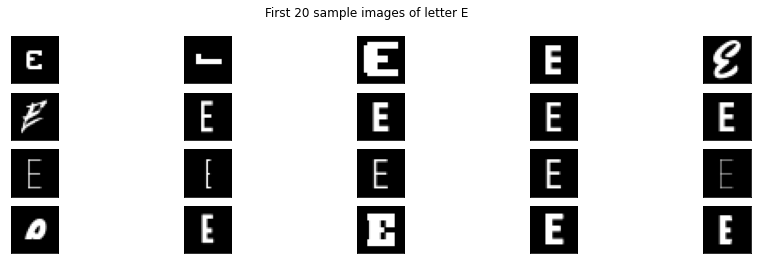

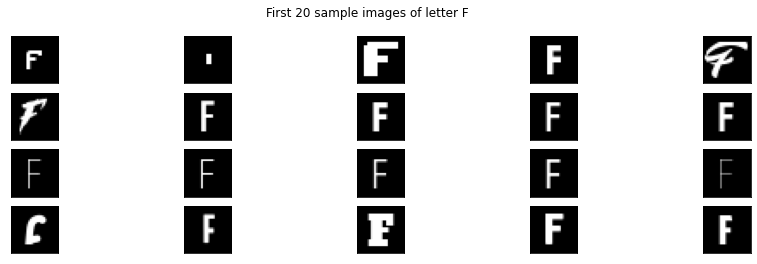

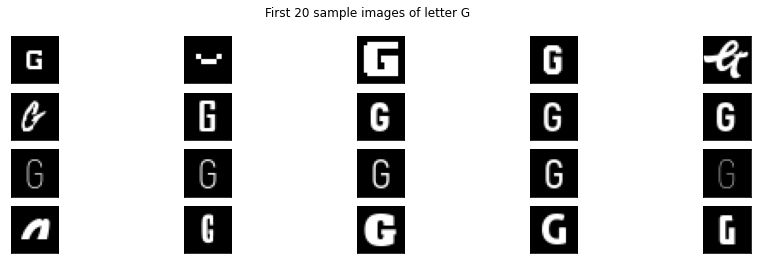

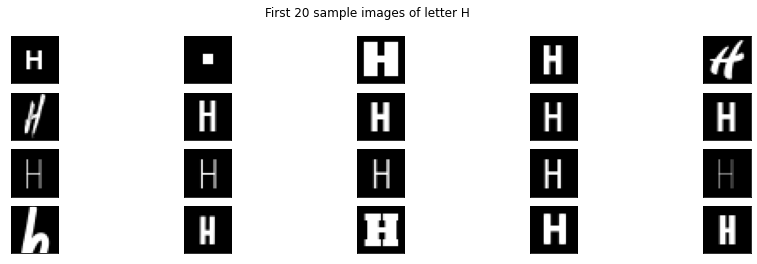

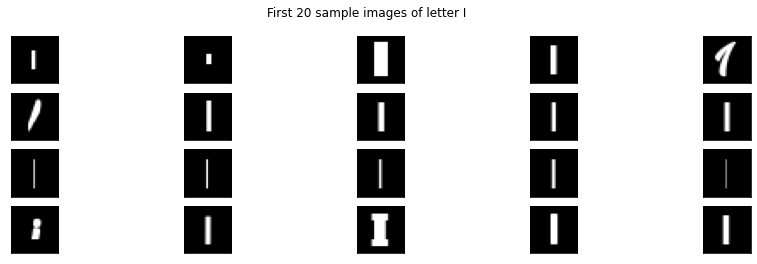

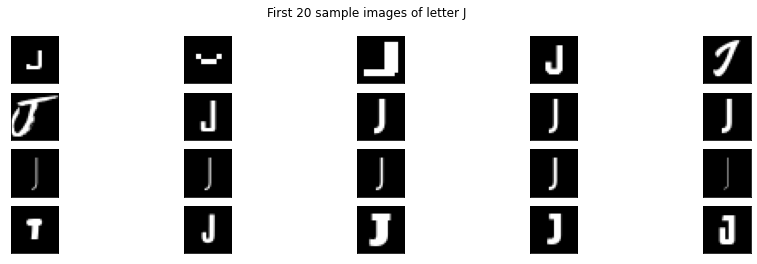

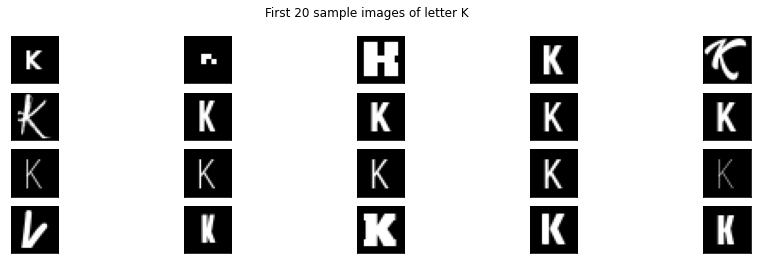

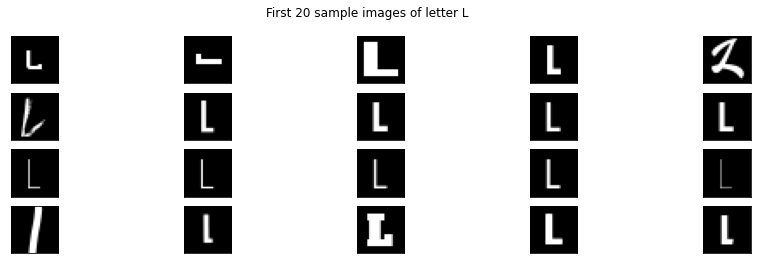

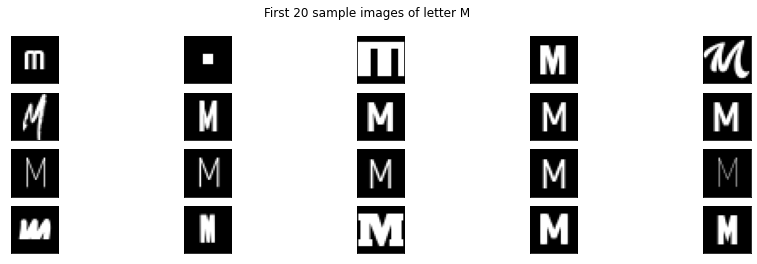

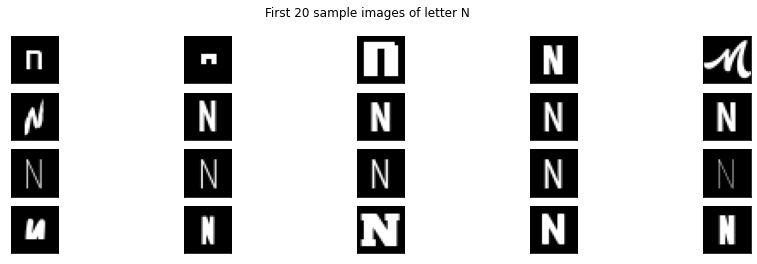

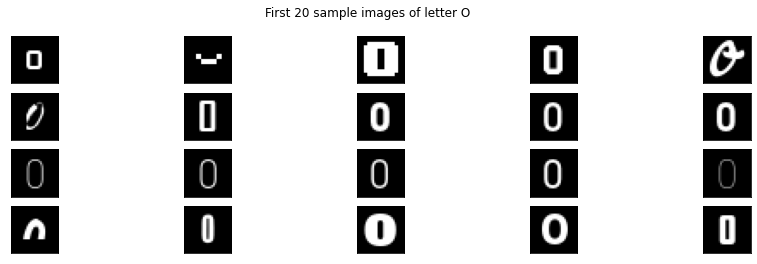

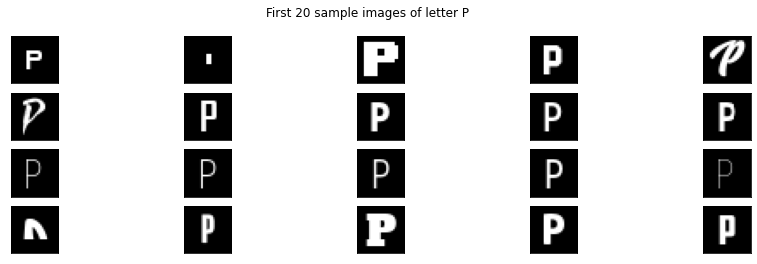

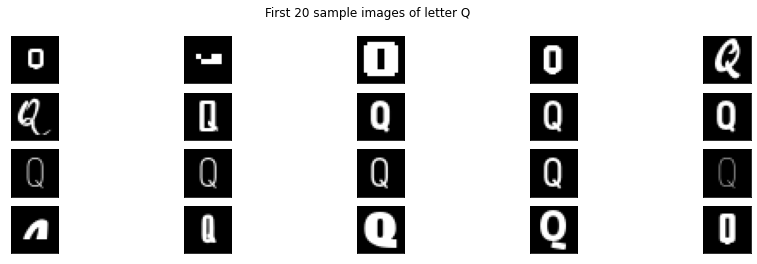

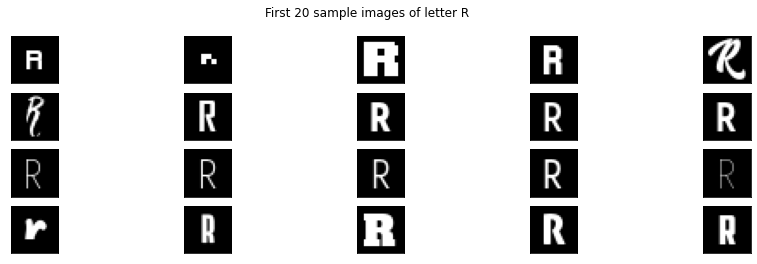

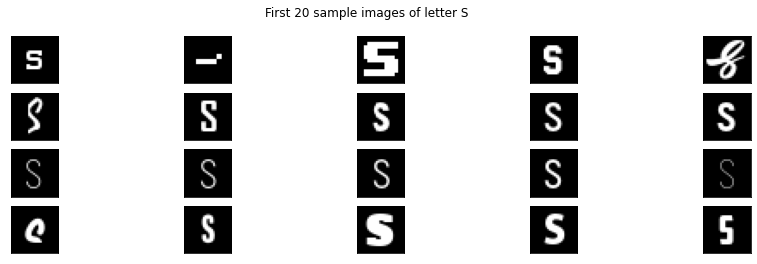

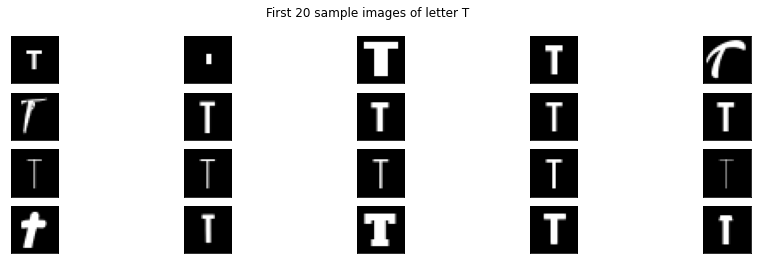

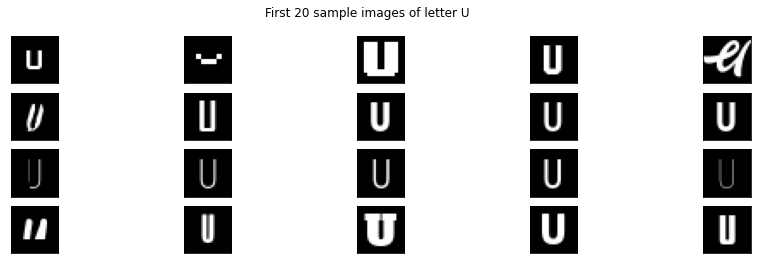

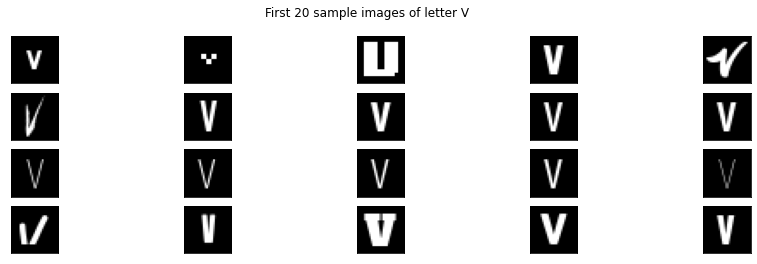

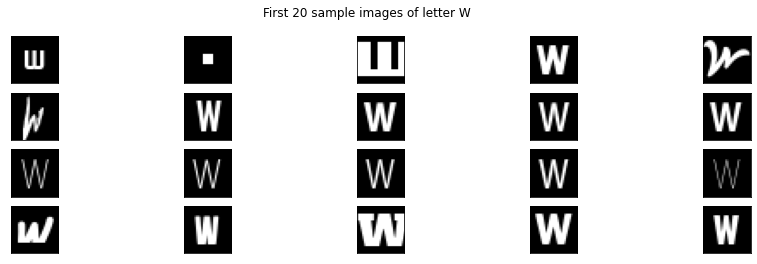

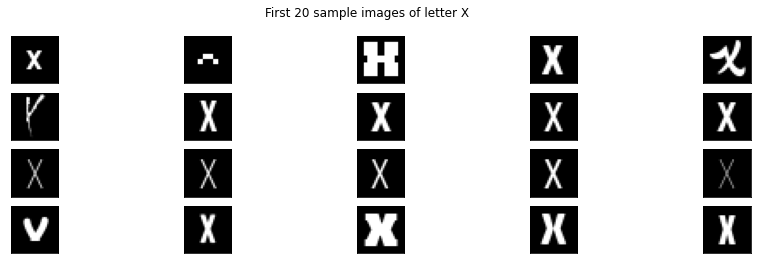

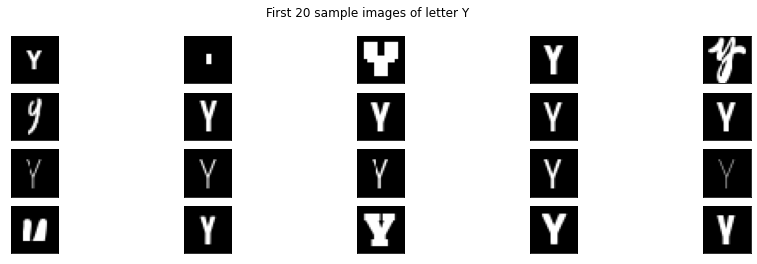

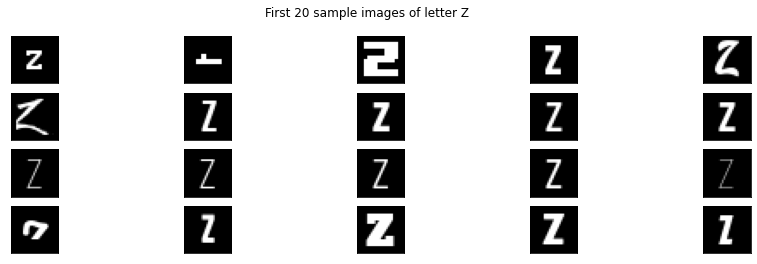

In [12]:
# Display of 20 images for each letter or class
labels = np.unique(df['label'])
for l in labels:
    Xsub = X[y == l,:]
    plt.figure(figsize=(15,4))
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.imshow(Xsub[i,:],cmap='gray', vmin=0, vmax=255)
        plt.xticks([])
        plt.yticks([])
    plt.suptitle('First 20 sample images of letter '+l)
    plt.show()

In [13]:
# converting string class to integer type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ytr = le.fit_transform(y)
ytr.shape

(7800,)

In [14]:
# Train-test splitting in 80:20 ratio with stratification w.r.t y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, ytr, test_size=0.2, random_state=2222594, stratify=ytr)
print('Train set feature shape:', X_train.shape)
print('Test set feature shape:', X_test.shape)

Train set feature shape: (6240, 28, 28, 1)
Test set feature shape: (1560, 28, 28, 1)


In [15]:
# Pre-processing train and test set by normalization by dividing with 255
X_train, X_test = X_train / 255, X_test / 255

### CNN model building, fitting and evaluation

In [34]:
# Clearing session data for tensorflow
tf.keras.backend.clear_session()

In [35]:
# CNN model creation
from tensorflow.keras import datasets,layers, models
cnnmodel = Sequential()
cnnmodel.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnnmodel.add(layers.MaxPooling2D((2, 2)))
cnnmodel.add(layers.Conv2D(56, (3, 3), activation='relu'))
cnnmodel.add(layers.MaxPooling2D((2, 2)))
cnnmodel.add(layers.Conv2D(112, (3, 3), activation='relu'))
cnnmodel.add(layers.Flatten())
cnnmodel.add(layers.Dense(56, activation='relu'))
cnnmodel.add(Dense(26, activation= "sigmoid"))
print(cnnmodel.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 112)         56560     
_________________________________________________________________
flatten (Flatten)            (None, 1008)              0         
_________________________________________________________________
dense (Dense)                (None, 56)                5

In [36]:
# compiling the CNN model
cnnmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

h = cnnmodel.fit(X_train, y_train, validation_split = 0.25, epochs = 30,batch_size=30)

Epoch 1/30
156/156 [==============================] - 4s 27ms/step - loss: 2.8782 - accuracy: 0.2726 - val_loss: 2.6587 - val_accuracy: 0.4628
Epoch 2/30
156/156 [==============================] - 4s 24ms/step - loss: 2.5756 - accuracy: 0.6440 - val_loss: 2.5407 - val_accuracy: 0.6974
Epoch 3/30
156/156 [==============================] - 4s 23ms/step - loss: 2.5072 - accuracy: 0.7412 - val_loss: 2.4988 - val_accuracy: 0.7590
Epoch 4/30
156/156 [==============================] - 4s 23ms/step - loss: 2.4741 - accuracy: 0.7885 - val_loss: 2.4823 - val_accuracy: 0.7487
Epoch 5/30
156/156 [==============================] - 3s 22ms/step - loss: 2.4472 - accuracy: 0.8216 - val_loss: 2.4724 - val_accuracy: 0.8077
Epoch 6/30
156/156 [==============================] - 4s 24ms/step - loss: 2.4320 - accuracy: 0.8415 - val_loss: 2.4642 - val_accuracy: 0.8154
Epoch 7/30
156/156 [==============================] - 4s 24ms/step - loss: 2.4235 - accuracy: 0.8504 - val_loss: 2.4535 - val_accuracy: 0.8186

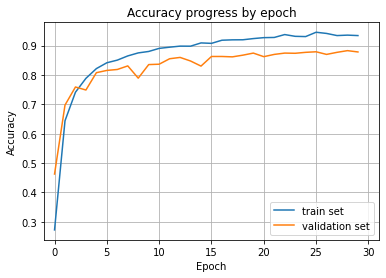

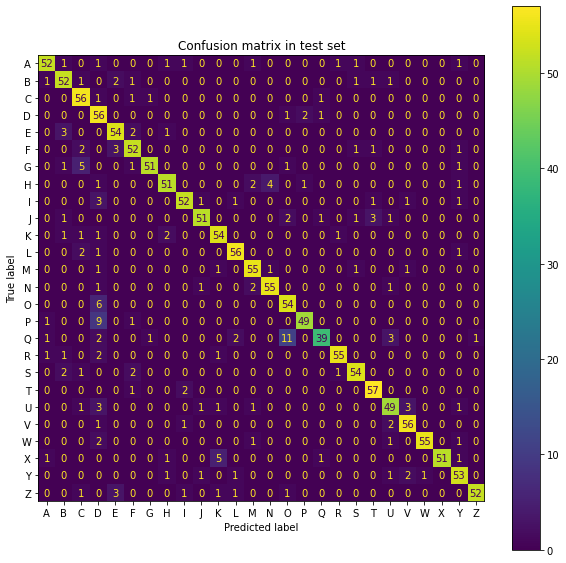

********		Summary of Evaluation scores in test set		********
Cross-Entropy loss: 2.4217
Accuracy score: 0.8788
Precision score: 0.8881
Recall score: 0.8788
F1 score: 0.8801


In [38]:
# plotting the training and validation accuracy progress
plt.plot(h.history['accuracy'], label='train set')
plt.plot(h.history['val_accuracy'], label = 'validation set')
plt.xlim([-1,31])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='best')
plt.title('Accuracy progress by epoch')
plt.show()
# predictions for test set
ypreds = np.argmax(cnnmodel.predict(X_test), axis=-1)
# loss and accuracy extraction for test set
loss,acc = cnnmodel.evaluate(X_test,  y_test, verbose=0)
cm = confusion_matrix(y_test, ypreds)
fig,axes = plt.subplots(figsize=(10,10))
# confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=axes)
plt.title('Confusion matrix in test set')
plt.show()
# display of all metrics for test set
prec,rec,f1,support = precision_recall_fscore_support(y_test, ypreds, average='macro')
print('********\t\tSummary of Evaluation scores in test set\t\t********')
print('Cross-Entropy loss: %.4f' %(loss))
print('Accuracy score: %.4f' %(acc))
print('Precision score: %.4f' %(prec))
print('Recall score: %.4f' %(rec))
print('F1 score: %.4f' %(f1))